# Logistic Regression Trail 1
  ## Exploratory Data Analysis
      1. Plotting the data
      
  ## Cleaning data 
      1. Dealling with a missing data by the following
           Filled in some missing values 
           Dropped some few missing values
      2. Dealing with categorical features by the following
           Creating a dummy variables
      
   ## Modeling 
      1. Split the data into training and testing
      2. Train the classification model --> it needs numeric features
      3. Confusion Matrix

**1. Dealling with a missing data by the following**

In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [7]:
train = pd.read_csv("C:\\AllamMarwa\\2- Courses\\Winter School in Spain\\Track1\\Day2\\titanic_train.csv")

In [39]:
#train.head()

In [40]:
#train.isnull()

#### Trace the null

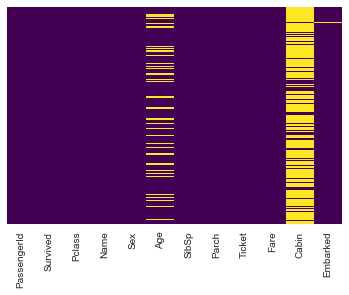

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [5]:
sns.set_style('whitegrid')

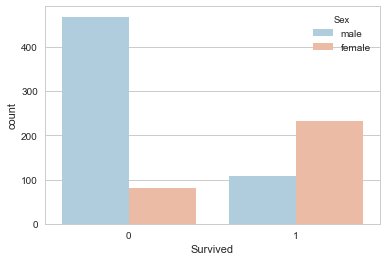

In [6]:
sns.countplot(x ='Survived',hue='Sex',data=train,palette = 'RdBu_r')

The insight from above plot is most of the dead people were male

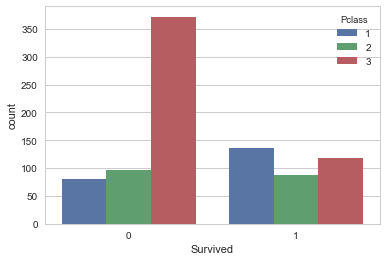

In [7]:
sns.countplot(x ='Survived',hue='Pclass',data=train)

The insight from the above plot is the most dead people were from pclass 3

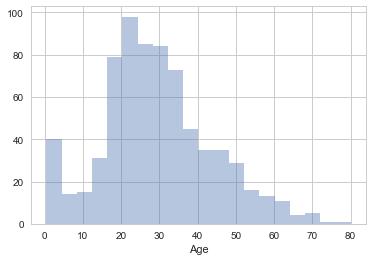

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins =20)

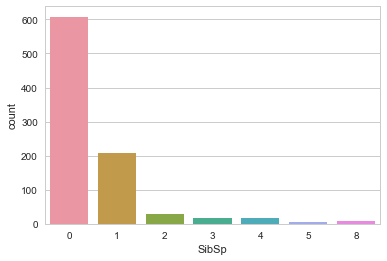

In [9]:
sns.countplot(x='SibSp',data=train)  
# most on board people have niether children or spouse (single people

The insight from the above plot is the majority in the passenger were single

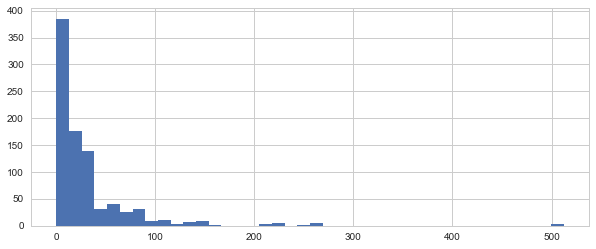

In [10]:
train['Fare'].hist(bins=40,figsize=(10,4))

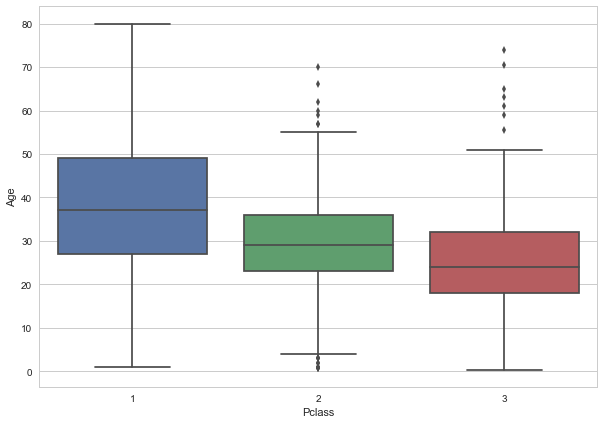

In [163]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass',y='Age',data= train)

The insight from the above plot is the weqlthier passengers in the higher classes tend to be older

In [8]:
int(train[train.Pclass==2]["Age"].mean())

29

In [9]:
for i in train.Pclass.unique():
    if pd.isnull(train[train.Pclass==i]["Age"]).sum()!=0:
        train.Age.fillna(train[train.Pclass==i]["Age"].mean(),inplace=True)
    print (i)

3
1
2


In [10]:
def impute(train,Pclass):
    for i in train.Pclass.unique():
        if pd.isnull(train[train.Pclass==i]["Age"]).sum()!=0:
            train.Age.fillna(train[train.Pclass==i]["Age"].mean(),inplace=True)
            print (i)
    return train

In [11]:
train = impute(train, train.Pclass)

In [12]:
def impute(train,var):
    for i in train.var.unique():
        if pd.isnull(train[train.var==i]["Age"]).sum()!=0:
            train.Age.fillna(train[train.var==i]["Age"].mean(),inplace=True)
            print (i)
    return train

In [13]:
#train = impute(train,train[['Pclass']])

In [14]:
#train.head()

In [86]:
#pd.isnull(train.Age)
#train.Age.unique()
#train.Pclass.unique()

Other function for impute the null value in column with another column's values

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
    #if pd.isnull(Age) == True:
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else: 
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

In [15]:
#pd.isnull(train).count()
#pd.isnull(train.Age).sum()
#train.isnull().sum()

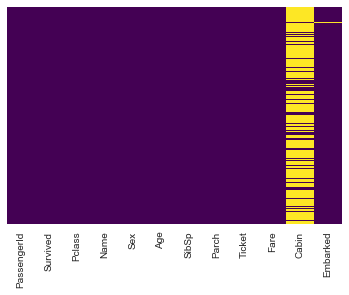

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [17]:
train.drop('Cabin',axis=1,inplace=True)

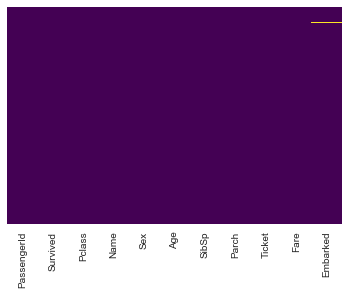

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [19]:
train.dropna(inplace = True)   #drop the null values in embarked columns

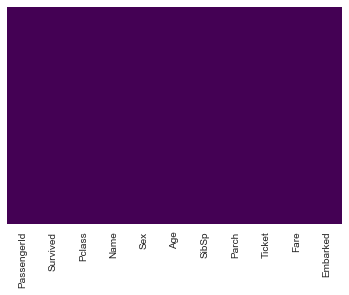

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [21]:
len(train)

889

**2. Dealing with categorical features**

In [22]:
Sex = pd.get_dummies(train[['Sex']], drop_first = True)

In [23]:
Embarked = pd.get_dummies(train[['Embarked']], drop_first = True)

In [27]:
Embarked.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
train = pd.concat([train, Sex, Embarked],axis = 1)

In [29]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [25]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1,inplace = True)

In [26]:
train.drop('PassengerId',axis = 1,inplace = True)

In [27]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [28]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

# Building the Logistic Regression

**1. Train the classification model  (Train/ Test Split)**

In [29]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [30]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [37]:
len(X_train), len(y_test)

(622, 267)

In [38]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
807,3,18.0,0,0,7.775,0,0,1
651,2,18.0,0,1,23.000,0,0,1


**2-Training and Predicting**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
logmodel.coef_

array([[-0.75215536, -0.02381646, -0.20899461, -0.0836601 ,  0.00467592,
        -2.33769809, -0.01140695, -0.17805586]])

In [43]:
logmodel.intercept_

array([ 3.37412494])

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

  **3. Confusion Matrix**  

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       163
          1       0.81      0.65      0.72       104

avg / total       0.81      0.81      0.80       267



In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 36,  68]])